#Importing the dependencies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

## Data Collection and Data Preprocessing

In [2]:
### Loading a dataset to a pandas dataframe
df = pd.read_csv("Bank dataset.csv")

In [3]:
# Loading First 5 Rows of our dataset
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [5]:
# To find NUmber of coloumn and rows
df.shape

(45211, 11)

* <font size = "4">Number of rows = 45211
* <font size = "4">Number of coloumns = 11

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


#<font size = "4"> "info" provides information about the dataset, such as its shape, data types, missing values, or basic statistics.THere are 45211 entries in our dataframe, in which 4 are integer and 7 are in object dtype.

In [7]:
df.describe()

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


# <font size = "4"> from "describe" you get a summary of the descriptive statistics of the numerical columns in your DataFrame.It includes statistics such as count, mean, standard deviation, minimum, maximum, and various quantiles.. By using this method, you can get a sense of the distribution of your data and identify potential issues such as outliers or missing values.
* <font size = "4"> Here, in age coloumn the mean is 40 and 50th percentile is 39 so there is a small amount of outlires present.
* <font size = "4">In call_day the difference between mean and 50th percentile is small so there is no outlires.
* <font size = "4"> In call_duration the mean is 258 and 50th percentile is 180.In this coloumn there is so many outlires.
* <font size = "4"> In call_frequency the mean is 2.7 and 50th percentile is 2,so we conclude that there is some outlires in this coloumn.

In [8]:
df["conversion_status"].value_counts()

conversion_status
not_converted    39922
converted         5289
Name: count, dtype: int64

#<font size = "4"> df.value_counts() helps you identify if there is an imbalance in the target variable,in "conversion_status" the data is imbalance/bias.so we will resample the data.

In [9]:
from sklearn.utils import resample

In [10]:
Not_converted= df[df["conversion_status"]=="not_converted"]
Converted = df[df["conversion_status"]=="converted"]

In [11]:
### Downsampling the data :
downsampled_data = resample(Not_converted ,replace=False,n_samples=len(Converted))

# <font size = "4"> Here, We make the data dounsampling,i.e. we reduces the "not_converted" dataset in the len(converted) dataset. 

In [12]:
downsampled_data 

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
44942,business_owner,31,college,single,mobile,January,29,445,2,unidentified,not_converted
24953,executive,48,college,divorced,mobile,November,21,275,2,unidentified,not_converted
27329,technical_specialist,32,high_school,married,unidentified,May,21,102,3,unidentified,not_converted
10366,technical_specialist,37,elementary_school,married,unidentified,May,6,76,4,unidentified,not_converted
39832,administrative_staff,56,high_school,divorced,mobile,August,18,150,2,unidentified,not_converted
...,...,...,...,...,...,...,...,...,...,...,...
10608,technical_specialist,32,high_school,single,mobile,August,29,451,4,unidentified,not_converted
42257,technical_specialist,44,elementary_school,married,mobile,November,19,250,1,unidentified,not_converted
25177,administrative_staff,33,high_school,divorced,mobile,January,28,119,2,unidentified,not_converted
35895,manual_worker,36,elementary_school,married,mobile,November,19,138,1,unidentified,not_converted


# <font size = "4"> Now,our downsampled data will be reduced till 5289 rows.

In [13]:
## Concatination of downsampled data and converted daataset
new_df=pd.concat([downsampled_data,Converted],axis=0)

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10578 entries, 44942 to 45205
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 10578 non-null  object
 1   age                        10578 non-null  int64 
 2   education_level            10578 non-null  object
 3   marital_status             10578 non-null  object
 4   communication_channel      10578 non-null  object
 5   call_month                 10578 non-null  object
 6   call_day                   10578 non-null  int64 
 7   call_duration              10578 non-null  int64 
 8   call_frequency             10578 non-null  int64 
 9   previous_campaign_outcome  10578 non-null  object
 10  conversion_status          10578 non-null  object
dtypes: int64(4), object(7)
memory usage: 991.7+ KB


# <font size = "4"> Now,our data size is 10578 rows(5289 of converted & 5289 of not_converted),dataset is converted into a balanced dataset.

In [15]:
new_df.reset_index(drop=True,inplace=True)

# <font size = "4"> After performing operations such as filtering, grouping, or aggregating data, the index of a DataFrame may become disorganized or altered. reset_index() allows you to reset the index to its default integer-based index

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 10578 non-null  object
 1   age                        10578 non-null  int64 
 2   education_level            10578 non-null  object
 3   marital_status             10578 non-null  object
 4   communication_channel      10578 non-null  object
 5   call_month                 10578 non-null  object
 6   call_day                   10578 non-null  int64 
 7   call_duration              10578 non-null  int64 
 8   call_frequency             10578 non-null  int64 
 9   previous_campaign_outcome  10578 non-null  object
 10  conversion_status          10578 non-null  object
dtypes: int64(4), object(7)
memory usage: 909.2+ KB


# <font size = "4"> Now our index become organized form.

# Age

<Axes: title={'center': 'Age'}, xlabel='X values', ylabel='Y values'>

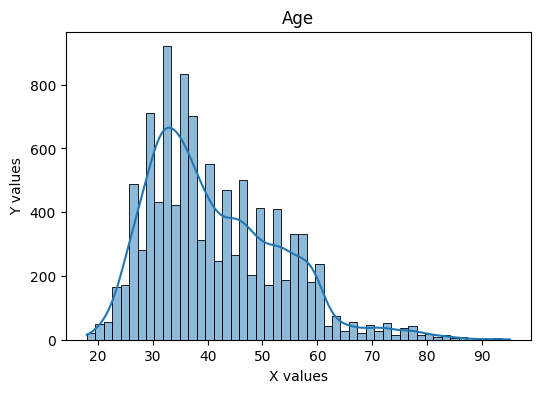

In [17]:
plt.figure(figsize=(6,4))
plt.title("Age")
plt.xlabel("X values")
plt.ylabel("Y values")
sns.histplot(new_df["age"],kde=True)

# <font size = "4"> Histograms display the range of values present in the dataset.The central tendency of the data can be observed from the peak of the histogram.our age data is bell shaped, remaing(above 70) are the outlires.

<Axes: title={'center': 'Age'}, xlabel='X values', ylabel='Y values'>

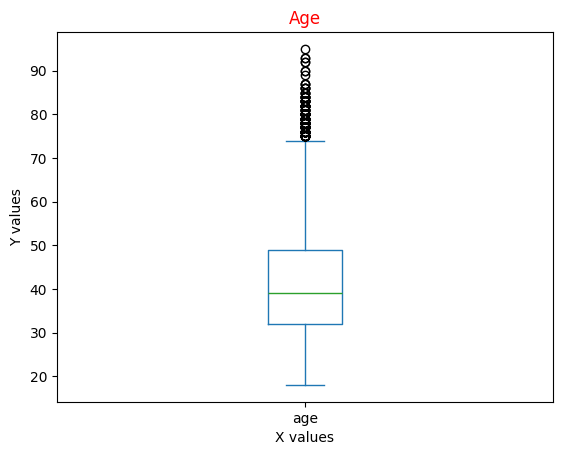

In [18]:
plt.title("Age",color="r")
plt.xlabel("X values")
plt.ylabel("Y values")
new_df["age"].plot.box()

# <font size = "4"> From above graph,There are some oulires above 75(approximetly) we can remove it.

In [19]:
new_df["age"].quantile(0.984)

73.0

In [20]:
new_df=new_df[new_df["age"]<new_df["age"].quantile(0.984)]

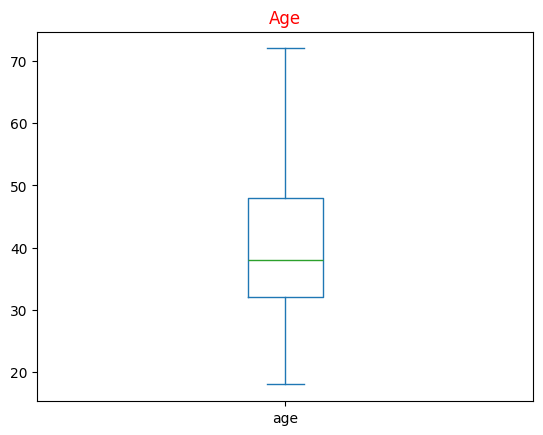

In [21]:
plt.title("Age",color="r")
new_df["age"].plot.box()
plt.show()

# <font size = "4"> We find the quantile , after that we removed the data above quantile to get outlierless data and save it , then our outlires in age coloumn will be removed.

# Call Day

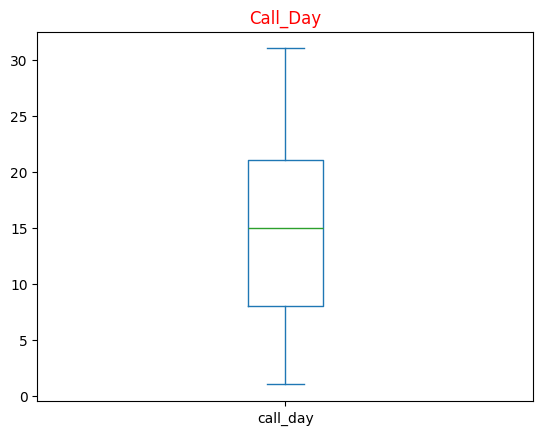

In [22]:
plt.title("Call_Day",color="r")
new_df["call_day"].plot.box()
plt.show()

# <font size = "4"> In call_day there is no outlires.

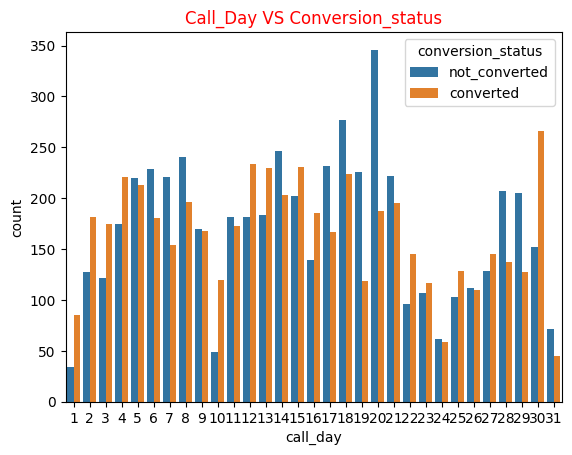

In [23]:
plt.title("Call_Day VS Conversion_status",color="r")
sns.countplot(new_df,x="call_day",hue="conversion_status")
plt.show()

# <font size = "4"> In above graph we see the conversion_status according to call_day.

# Call Duration

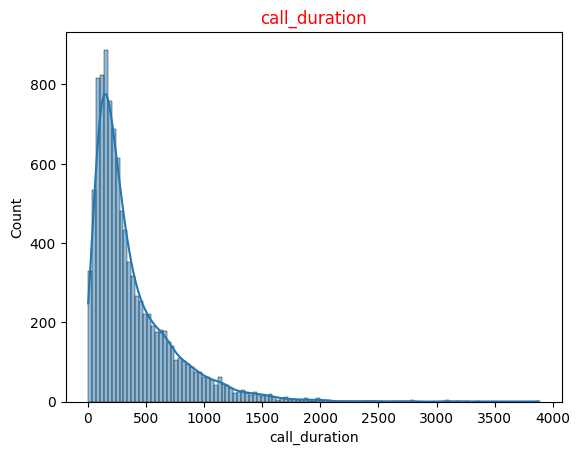

In [24]:
plt.title("call_duration",color="r")
sns.histplot(new_df["call_duration"],kde=True)
plt.show()

# <font size = "4"> Histogram provide a visual representation of the frequency of call_duration.Here,the histgram is not normally distributed and aprox above 1500 value is outlires.

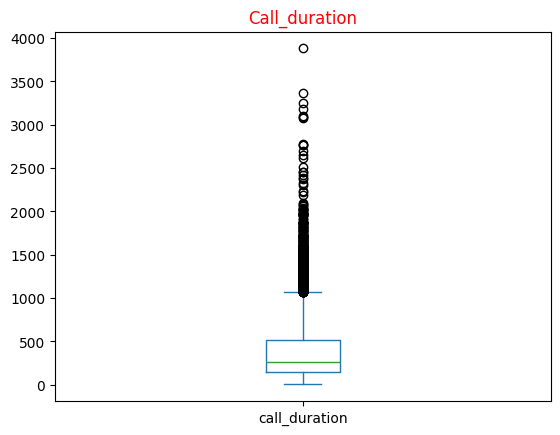

In [25]:
plt.title("Call_duration",color="r")
new_df["call_duration"].plot.box()
plt.show()

# <font size = "4"> In Above graph we have to see there are so many outlires,we have to remove it.

In [26]:
new_df["call_duration"].quantile(0.878)

779.2739999999994

# <font size = "4"> The quantile of call_duration at 87.8 % is 776. and after that there is a outlier,we have to remove it

In [27]:
# Removing Outliers and save it in new_df.
new_df=new_df[new_df["call_duration"]<new_df["call_duration"].quantile(0.878)]

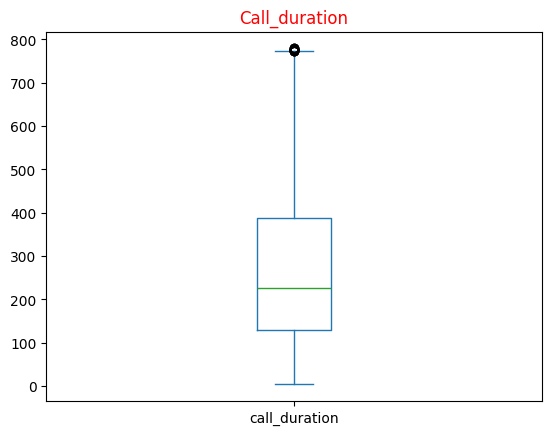

In [28]:
# Checking Outliers in new_df
plt.title("Call_duration",color="r")
new_df["call_duration"].plot.box()
plt.show()

In [29]:
np.corrcoef(new_df["call_day"],new_df["call_duration"])

array([[ 1.        , -0.00954134],
       [-0.00954134,  1.        ]])

# <font size = "4"> A negative correlation coefficient indicates an inverse relationship between the call_day and call_duration

### Call Frequency

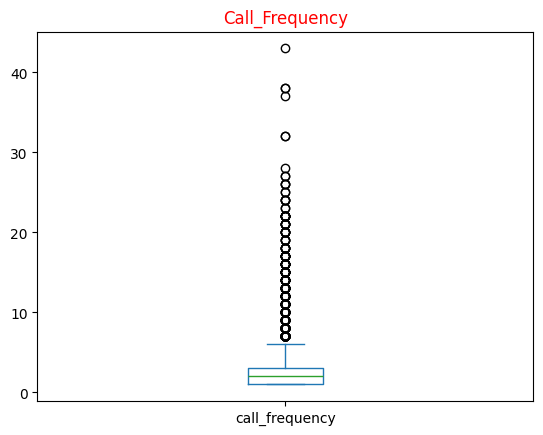

In [30]:
# Checking Outlires with the help of box_plot
plt.title("Call_Frequency",color="r")
new_df["call_frequency"].plot.box()
plt.show()

In [31]:
new_df["call_frequency"].quantile(0.89)

4.0

# <font size = "4"> The quantile of call_frequency at 89.4 % is 5, and after that there is a outlier,we have to remove it

In [32]:
# Removing Outliers and save it in new_df.
new_df=new_df[new_df["call_frequency"]<new_df["call_frequency"].quantile(0.89)]

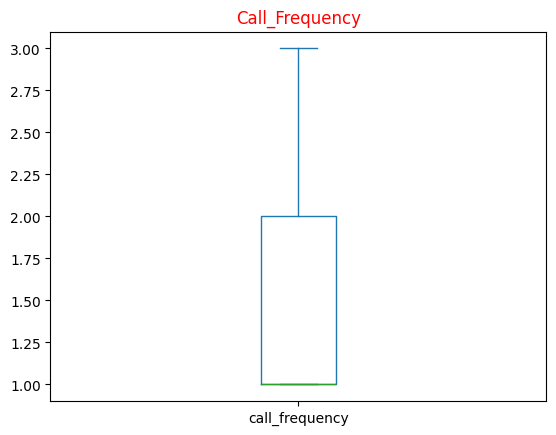

In [33]:
plt.title("Call_Frequency",color="r")
new_df["call_frequency"].plot.box()
plt.show()

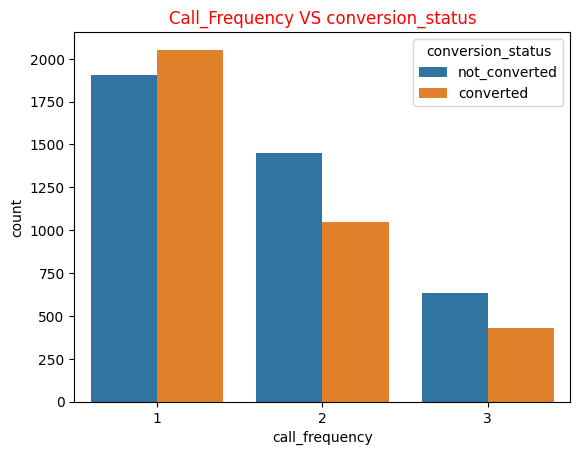

In [34]:
plt.title("Call_Frequency VS conversion_status",color="r")
sns.countplot(new_df,x="call_frequency",hue="conversion_status")
plt.show()

# <font size = "4"> From above Graph , the more converted client ,which are connected only once.and the client who connected twice or thrice ,the value of  not_converted client is more.This is not possible thing.if we drop this coloumn,there is no impact on target coloumn.

In [35]:
np.corrcoef(new_df["call_frequency"],new_df["call_day"])

array([[1.        , 0.04305211],
       [0.04305211, 1.        ]])

# <font size = "4">A correlation coefficient of 0.04 indicates a very weak positive correlation between  call_frequency and call_day.

In [36]:
np.corrcoef(new_df["call_frequency"],new_df["call_duration"])

array([[ 1.00000000e+00, -3.61433171e-04],
       [-3.61433171e-04,  1.00000000e+00]])

# <font size = "4"> The correlation value is negative, it indicates a negative correlation between call_frequency and call_duration.

# occupation

In [37]:
new_df["occupation"].value_counts()

occupation
executive               1705
manual_worker           1308
technical_specialist    1234
administrative_staff     933
service_worker           643
retired_worker           440
student                  287
jobless                  277
independent_worker       265
business_owner           204
domestic_worker          179
unidentified              44
Name: count, dtype: int64

# <font size = "4"> from value_counts , you can get a sense of how frequently occupation coloumn appears in the dataset.

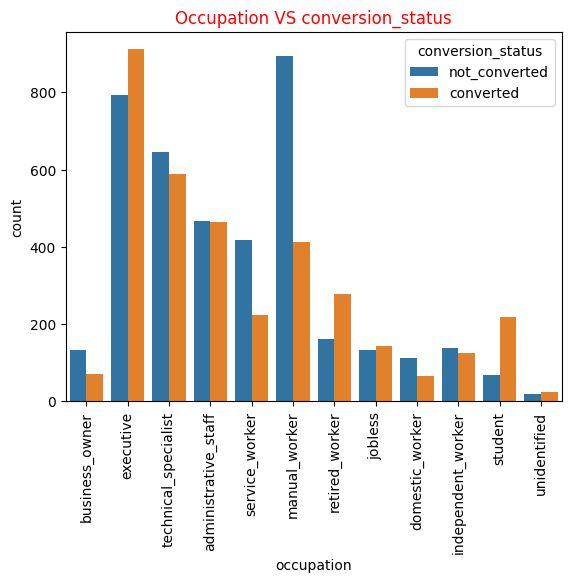

In [38]:
plt.title("Occupation VS conversion_status",color="r")
sns.countplot(new_df,x="occupation",hue="conversion_status")
plt.xticks(rotation=90)
plt.show()

# <font size = "4"> In above graph we observe that conversion_status according to occupation.The number of converted client is more in student,jobless,executive and retired_worker.The number of not_converted client is more in independent_worker,business_owner,administrative_staff,domestic_worker,manual_worker,service_worker and technical_specialist.

# Educational Level

In [39]:
new_df["education_level"].value_counts()

education_level
high_school          3784
college              2490
elementary_school     922
unidentified          323
Name: count, dtype: int64

# <font size = "4"> From value_counts of education_level we can find the categories in that coloumn.

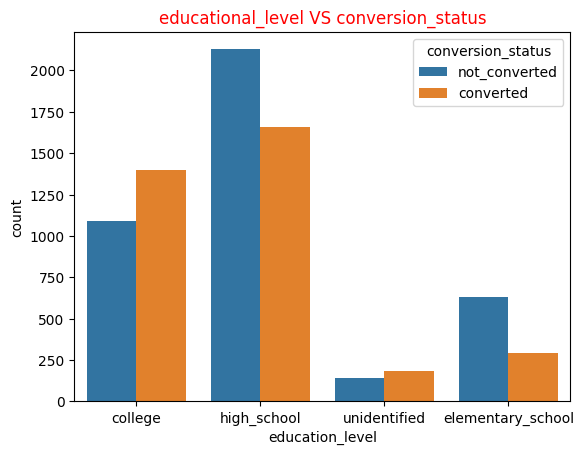

In [40]:
plt.title("educational_level VS conversion_status",color="r")
sns.countplot(new_df,x="education_level",hue="conversion_status")
plt.show()

# <font size = "4"> From graph,the number of converted client is more in college and the number of not_converted client is more in high_school and elementory_school.

# Marital Status


In [41]:
new_df["marital_status"].value_counts()

marital_status
married     4196
single      2511
divorced     812
Name: count, dtype: int64

# <font size = "4"> From value_counts of marital status we find 4579 married,2677 single and 884 divorced.

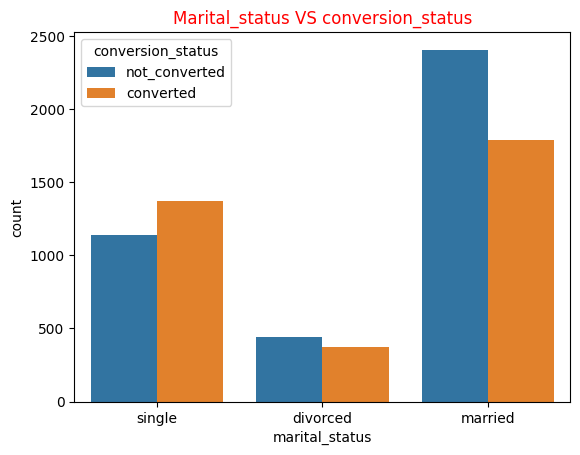

In [42]:
plt.title("Marital_status VS conversion_status",color="r")
sns.countplot(new_df,x="marital_status",hue="conversion_status")
plt.show()

# <font size = "4"> From above graph , we observe that the number of converted client is more have single status and the number of not_converted client is more in divorced and in married.

# Communication Channel

In [43]:
new_df["communication_channel"].value_counts()

communication_channel
mobile          5631
unidentified    1495
landline         393
Name: count, dtype: int64

# <font size = "4"> value_counts is used to count the occurrences of unique values in a communication_channel column , in this there are 3 values in communication_channel coloumn.

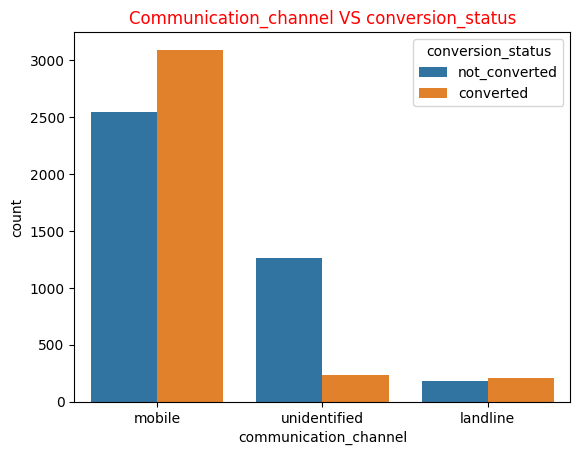

In [44]:
plt.title("Communication_channel VS conversion_status",color="r")
sns.countplot(new_df,x="communication_channel",hue="conversion_status")
plt.show()

# <font size = "4">From above graph , we observe that the number of converted client is more who had communicate with the help of mobile and who had communicate with the help of landline,the number of converted and not_converted is approximetly same.

# Call Month

In [45]:
df["call_month"].value_counts()

call_month
May          13766
July          6895
August        6247
June          5341
November      3970
April         2932
February      2649
January       1403
October        738
September      579
March          477
December       214
Name: count, dtype: int64

# <font size = "4"> value_counts is used to count the occurrences of unique values in a call_month column , in this there are 12 values in communication_channel coloumn.

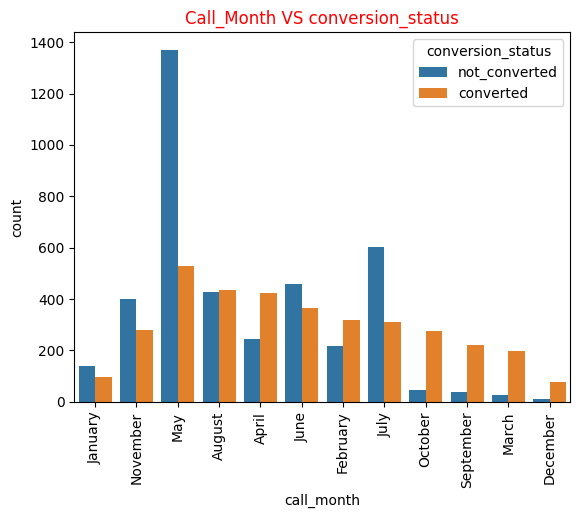

In [46]:
plt.title("Call_Month VS conversion_status",color="r")
sns.countplot(new_df,x="call_month",hue="conversion_status")
plt.xticks(rotation=90)
plt.show()

# <font size = "4"> Here we find the countplot of call_month according to conversion_status which is our target coloumn.

# Previous Campain Outcome

In [47]:
df["previous_campaign_outcome"].value_counts()

previous_campaign_outcome
unidentified     36959
unsuccessful      4901
other_outcome     1840
successful        1511
Name: count, dtype: int64

# <font size = "4"> value_counts is used to count the occurrences of unique values in a previous_campaign_outcome column , in this there are 4 values in communication_channel coloumn.

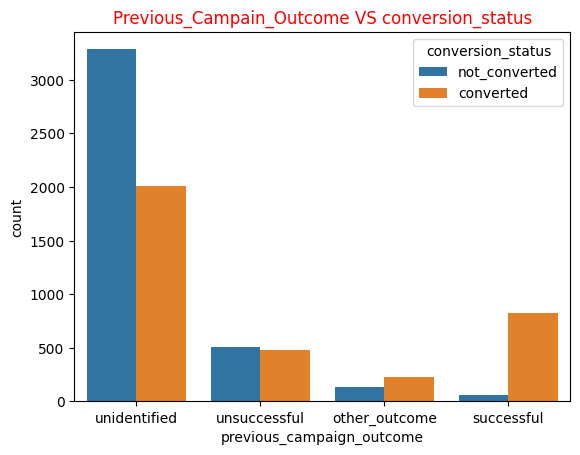

In [48]:
plt.title("Previous_Campain_Outcome VS conversion_status",color="r")
sns.countplot(new_df,x="previous_campaign_outcome",hue="conversion_status")
plt.show()

# <font size = "4"> Here we find the countplot of  previous_campaign_outcome according to conversion_status which is our target coloumn.

In [49]:
from sklearn.preprocessing import LabelEncoder

# <font size = "4"> Label encoding is a technique used in machine learning to convert categorical variables into numerical format.

In [50]:
le = LabelEncoder()

# <font size = "4"> We have need to convert the occupation,education_level,marital_status,communication_channel and previous_campaign_outcome coloumn in number datatype. 
### In this coloumns we use nominal encoder because there is no any priority in coloumns.

In [51]:
le.fit_transform(new_df["occupation"])

array([ 1,  3, 10, ...,  7, 10,  5])

In [52]:
new_df["occupation"] = le.fit_transform(new_df["occupation"])

In [53]:
le.fit_transform(new_df["education_level"])

array([0, 0, 2, ..., 1, 2, 2])

In [54]:
new_df["education_level"] = le.fit_transform(new_df["education_level"])

In [55]:
le.fit_transform(new_df["marital_status"])

array([2, 0, 1, ..., 1, 2, 0])

In [56]:
new_df["marital_status"] = le.fit_transform(new_df["marital_status"])

In [57]:
le.fit_transform(new_df["communication_channel"])

array([1, 1, 2, ..., 0, 1, 1])

In [58]:
new_df["communication_channel"] = le.fit_transform(new_df["communication_channel"])

In [59]:
le.fit_transform(new_df["previous_campaign_outcome"])

array([2, 2, 2, ..., 1, 2, 2])

In [60]:
new_df["previous_campaign_outcome"] = le.fit_transform(new_df["previous_campaign_outcome"])

### In above we convert all these coloumns in numeric data type .Firstly we fit the coloumn and then save the dataframe.

In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7519 entries, 0 to 10577
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 7519 non-null   int32 
 1   age                        7519 non-null   int64 
 2   education_level            7519 non-null   int32 
 3   marital_status             7519 non-null   int32 
 4   communication_channel      7519 non-null   int32 
 5   call_month                 7519 non-null   object
 6   call_day                   7519 non-null   int64 
 7   call_duration              7519 non-null   int64 
 8   call_frequency             7519 non-null   int64 
 9   previous_campaign_outcome  7519 non-null   int32 
 10  conversion_status          7519 non-null   object
dtypes: int32(5), int64(4), object(2)
memory usage: 558.1+ KB


### Here we convert the data type of all object coloumn into integer coloumn , but the call_month and conversion_status is in object dtype.
### conversion_status is our output coloumn so we have not need to convert it. 
### and in call_month we use ordinal encoding.

In [62]:
new_df["call_month"].value_counts()

call_month
May          1900
July          915
August        863
June          826
November      683
April         665
February      538
October       319
September     259
January       236
March         225
December       90
Name: count, dtype: int64

# <font size = "4"> In coloumn call_month,there are 12 categoried which are the name of month.we have to convert it in numbers.

In [63]:
custom_mapping = {"January":1 , "February":2 , "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, 
                  "October":10, "November":11 ,"December":12}

# <font size = "4"> Here we create a directory named custom_mapping

In [64]:
new_df["call_month"]= list(map(custom_mapping.get,new_df["call_month"]))

# <font size = "4"> .get() method is a built-in method used with dictionaries. It's commonly used to retrieve the value associated with a specified key in a dictionary.
#### We get the values in directory and map & list them and save it.

In [65]:
new_df.isna().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

# <font size = "4"> Here we check the null values in our dataframe. There is no any null values in our df.

## Creating Models

In [66]:
X=new_df.drop("conversion_status",axis=1)
y=new_df["conversion_status"]

# <font size = "4"> where "X" represents the features and "y" represents the target variable.

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=56)

# <font size = "4"> Train_test_split splitting the available dataset into two subsets: one for training the model (the training set) and the other for evaluating its performance (the test set). 

# <font size = "4"> Here,We give 25% data for testing and 75% data for Training.

In [68]:
scalar =StandardScaler()

In [69]:
X_train = scalar.fit_transform(X_train)

In [70]:
X_test = scalar.transform(X_test)

# <font size = "4"> StandardScaler is a widely used preprocessing technique in machine learning for standardizing the scale of features, improving model performance, and ensuring compatibility with various machine learning algorithms. It is often applied as a preprocessing step before training a machine learning model to enhance its performance and stability.

## Generating Models

In [71]:
lo = LogisticRegression()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier(n_neighbors=3)
svc = SVC(kernel="linear")

# <font size = "4"> Here,We create a list of model name,score,accuracy score ,confusion matrix and classification score with the help of for loop.

In [72]:
d = []
for i in [lo,dtc,knc,svc]:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    score=i.score(X_train,y_train)
    ac=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test, y_pred)
    cr=classification_report(y_test,y_pred)
    d.append({"Model":i,"Score":score, "Accuracy Score":ac,"confusion_matrix":cm,"classification_report":cr})

In [73]:
### Creating dataframe 
model_details = pd.DataFrame(d)

In [74]:
model_details

,Model,Score,Accuracy Score,confusion_matrix,classification_report
0,LogisticRegression(),0.729562,0.748404,"[[633, 250], [223, 774]]",precision recall f1-score ...
1,DecisionTreeClassifier(),1.000000,0.765426,"[[652, 231], [210, 787]]",precision recall f1-score ...
2,KNeighborsClassifier(n_neighbors=3),0.876397,0.764894,"[[631, 252], [190, 807]]",precision recall f1-score ...
3,SVC(kernel='linear'),0.737187,0.747872,"[[638, 245], [229, 768]]",precision recall f1-score ...


#### The models include Logistic Regression, Decision Tree Classifier, K-Nearest Neighbors (KNN) Classifier, and Support Vector Classifier (SVC) with a linear kernel.
#### The Decision Tree Classifier achieved the highest score of 1.000 and the highest accuracy score of 0.776 among the models evaluated.
#### Logistic Regression, KNN, and SVC achieved scores ranging from 0.741 to 0.745 and accuracy scores ranging from 0.721 to 0.729.729.29.

### Accuracy Score:
#### Accuracy score represents the overall correctness of the model's predictions.
#### Decision Tree Classifier achieved the highest accuracy score of 0.776, indicating that it correctly classified 77.6% of the instances in the dataset.
#### Logistic Regression, KNN, and SVC achieved accuracy scores ranging from 0.721 to 0.729.

####  While the Decision Tree Classifier achieved the highest accuracy score, it's important to consider other factors such as overfitting.
#### Logistic Regression and SVC with a linear kernel have similar scores and accuracy scores, indicating comparable performance.
#### KNN performs slightly worse in terms of accuracy compared to the other models but still demonstrates reasonable performance.

 ### The Decision Tree Classifier appears to be the best-performing model based on the provided metrics, achieving the highest accuracy score. 
 ### so we check the confusion_matrix and classification_report of decision tree classifier.

In [75]:
print(model_details.iloc[1]["confusion_matrix"])

[[652 231]
 [210 787]]


* <font size = "4">True Positives (TP): Instances correctly predicted as positive(i.e Actual converted and also predict converted)
* <font size = "4">True Negatives (TN): Instances correctly predicted as negative(i.e Actual not_converted and also predict not converted)
* <font size = "4">False Positives (FP : Type 1 Error): Instances incorrectly predicted as positive(i.e. Actual not_converted and predict Converted)
* <font size = "4">False Negatives (FN: Type 2 Errosr): Instances incorrectly predicted as negative(i.e. Actual converted and predict Not_converted)
#### This confusion matrix suggests that the model has fairly good performance.

In [76]:
print(model_details.iloc[1]["classification_report"])

               precision    recall  f1-score   support

    converted       0.76      0.74      0.75       883
not_converted       0.77      0.79      0.78       997

     accuracy                           0.77      1880
    macro avg       0.76      0.76      0.76      1880
 weighted avg       0.77      0.77      0.77      1880



### A classification report provides a detailed evaluation of a classification model's performance, including precision, recall, F1-score, and support for each class.
### For Decision Tree Classifier
* <font size = "4">The model has relatively high precision, recall, and F1-score for both classes.
* <font size = "4">The performance is slightly better for the "not_converted" class based on precision, recall, and F1-score.*    
* <font size = "4">The accuracy of the model is 78%, indicating its overall correctness in classifying instance


## K-Fold Cross Validation Technique

In [77]:
from sklearn.model_selection import cross_val_score, KFold

# <font size = "4">K-fold cross-validation is a valuable technique for evaluating and comparing machine learning models.Here we use k-fold cross validation for decision tree classifier model to check the performance compared to train test split.

In [78]:
dtc1 = DecisionTreeClassifier(max_depth=5)

# <font size = "4"> Here,we make one other model to check and give the depth of decision tree is 5.

In [79]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# <font size = "4"> We are initializing a K-Fold cross-validation object with 5 splits, shuffling the data before splitting, and setting a random state for reproducibility.

In [80]:
cv_scores = cross_val_score(dtc1, X, y, cv=kfold, scoring='accuracy')

In [81]:
cv_scores

array([0.76263298, 0.76728723, 0.76662234, 0.77593085, 0.74717232])

In [82]:
cv_scores.mean()

0.7639291452555882

# <font size = "4">Here , we got the 76% acuuracy which nearby our accuarcy.so our train test split accuracy is correct.

#### Feature importance helps in understanding which features have the most significant impact on the model's predictions.

In [83]:
feature_importance = dtc.feature_importances_

In [84]:
feature_importance

array([0.04625885, 0.10180423, 0.03380623, 0.02712836, 0.08677047,
       0.12729944, 0.12489392, 0.33902214, 0.02925649, 0.08375987])

# <font size = "4"> Higher values indicate greater importance. In this array the highest value is 0.3 so our call_duration coloumn is more correct coloumn for our Decision Tree Classifier model.and the lowest accuracy is 0.022, so our education level coloumn is not important for our Decision Tree Classifier model.

## Model Deployment

In [85]:
import joblib

In [86]:
joblib.dump(dtc, "Bank_Marketing_Dataset_joblib") 

['Bank_Marketing_Dataset_joblib']